<figure>
    <img src="../_images/dnd-logo.png" alt="Dungeons and Dragons Logo!"/>
    <figure-caption>image from https://www.enworld.org/resources/d-d-5e-logo-pack.1043/</figure-caption>
</figure>

# An Analysis of Dungeons and Dragons 5ed Monsters 
## Using data found from [Patrick Gomes at Kaggle](https://www.kaggle.com/datasets/patrickgomes/dungeons-and-dragons-5e-monsters/data) I will look to see if I can answer a few questions regarding the diversity of monsters in Dungeons and Dragons Fifth Edition (to be called 5e for the remainder of this project). I will pose the following questions
### 1. What are the most common monster types (shown as race in this data)?
### 2. Is there a noticeable disparity between monster types?
### 3. Is there any connection between monster type and alignment?
### 4. Does monster size impact hit point amounts?
### 5. Does a monster’s armor class have a correlation with its hit points?

In [2]:
#import libraries used for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.markers import MarkerStyle

In [3]:
#read in the CSV file and see a preview of the data
dnd = pd.read_csv('Dd5e_monsters.csv')
dnd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    324 non-null    object
 1   Size                    324 non-null    object
 2   Race + alignment        324 non-null    object
 3   HP                      324 non-null    object
 4   Armor                   324 non-null    object
 5   Speed                   324 non-null    object
 6   Challenge rating  (XP)  324 non-null    object
dtypes: object(7)
memory usage: 17.8+ KB


In [4]:
#look over the columns names and first three rows worth of data
dnd.head(3)

,Name,Size,Race + alignment,HP,Armor,Speed,Challenge rating (XP)
0,Aboleth,Large,"aberration, Lawful Evil",135 (18d10+36),17 (Natural Armor),"10 ft., swim 40 ft.","10 (5,900 XP)"
1,Acolyte,Medium,"humanoid (any race), Any Alignment",9 (2d8),10,30 ft.,1/4 (50 XP)
2,Adult Black Dragon,Huge,"dragon, Chaotic Evil",195 (17d12+85),19 (Natural Armor),"40 ft., fly 80 ft., swim 40 ft.","14 (11,500 XP)"


In [5]:
#Check for any null values even those this data set looks pretty clean at a glance
dnd.isnull().sum()

Name                      0
Size                      0
Race + alignment          0
HP                        0
Armor                     0
Speed                     0
Challenge rating  (XP)    0
dtype: int64

## What are the most common monster types (shown as race in this data)?

To work on this question I plan on splitting up Race+Alignment into two separate columns

In [6]:
# found that some of the data had multiple commas, so starting from the end of the string was the trick
dnd[['Race','Alignment']] = dnd['Race + alignment'].str.rsplit(',', n=1, expand=True)
dnd['Alignment'] = dnd['Alignment'].str.strip()


In [7]:
# Let's also clean up some of the other columns for future discussion.
dnd['Armor'] = dnd['Armor'].apply(lambda x: int(x.split(' (')[0]))
dnd['HP'] = dnd['HP'].apply(lambda x: int(x.split(' (')[0]))


In [8]:
dnd = dnd.drop(['Race + alignment', 'Challenge rating  (XP)'], axis=1)

In [9]:
dnd.head()

,Name,Size,HP,Armor,Speed,Race,Alignment
0,Aboleth,Large,135,17,"10 ft., swim 40 ft.",aberration,Lawful Evil
1,Acolyte,Medium,9,10,30 ft.,humanoid (any race),Any Alignment
2,Adult Black Dragon,Huge,195,19,"40 ft., fly 80 ft., swim 40 ft.",dragon,Chaotic Evil
3,Adult Blue Dragon,Huge,225,19,"40 ft., burrow 30 ft., fly 80 ft.",dragon,Lawful Evil
4,Adult Brass Dragon,Huge,172,18,"40 ft., burrow 40 ft., fly 80 ft.",dragon,Chaotic Good


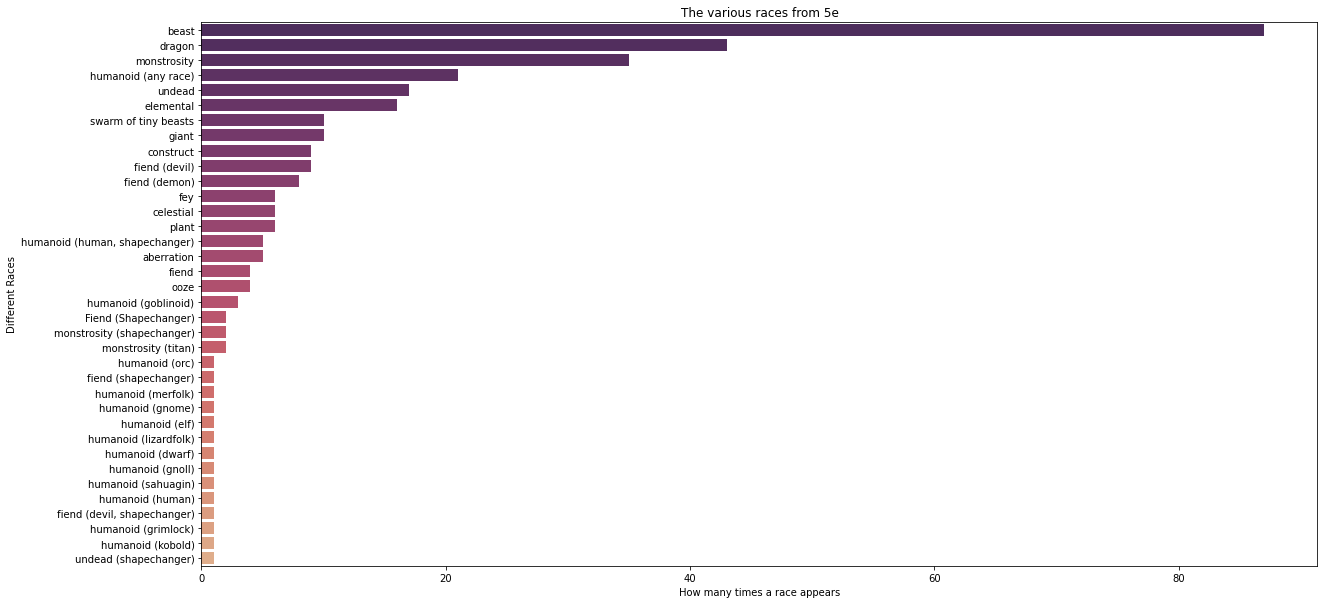

In [10]:
# Plotting out a graph to show the monsters. A lot of humanoid variants. 
different_races_count = dnd['Race'].value_counts()
different_races = dnd['Race'].value_counts().keys()

fig, ax = plt.subplots(figsize=(20,10))

sns.barplot(ax=ax, x=different_races_count, y=different_races, palette='flare_r',data=dnd)
plt.title('The various races from 5e')
plt.xlabel('How many times a race appears')
plt.ylabel('Different Races')
plt.show()

Even if we combined all of the humanoid variants, the number of Beasts surpasses all other individual races by double. Let's try and combine the races into fewer categories.

In [11]:
dnd['Race'] = dnd['Race'].apply(lambda x: x.split(' ')[0])

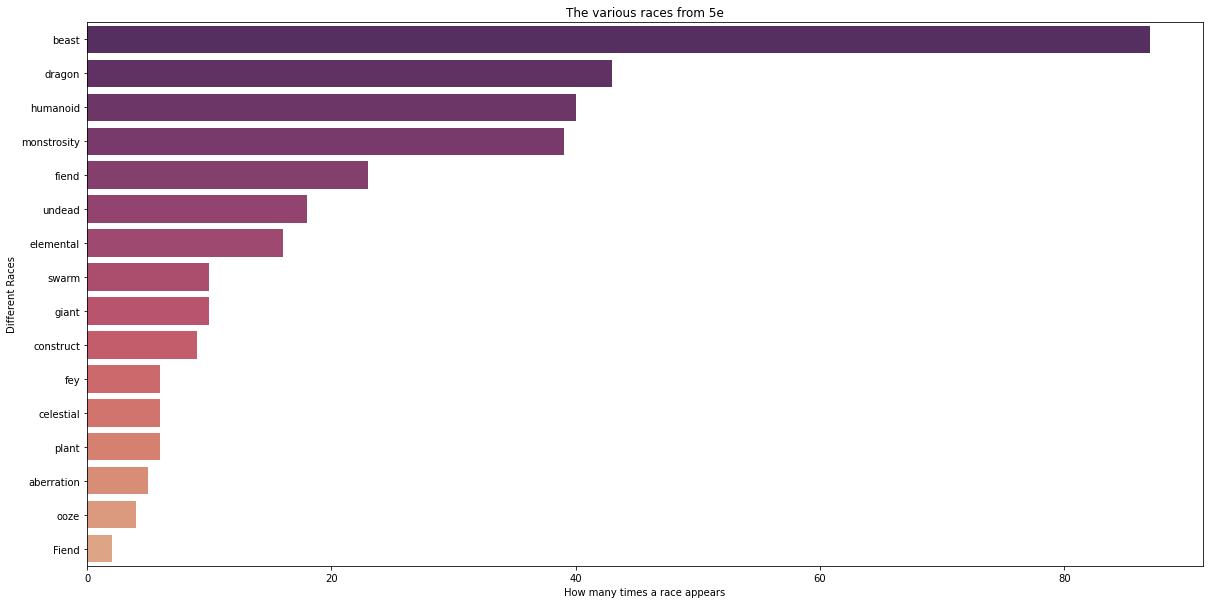

In [12]:
# let's recreate the graph from above 
different_races_count = dnd['Race'].value_counts()
different_races = dnd['Race'].value_counts().keys()

fig, ax = plt.subplots(figsize=(20,10))

sns.barplot(ax=ax, x=different_races_count, y=different_races, palette='flare_r',data=dnd)
plt.title('The various races from 5e')
plt.xlabel('How many times a race appears')
plt.ylabel('Different Races')

plt.show()

As we can see from the chart beasts are the most prevalent race in 5e, with Dragons, Humanoids (of varying types), and Monstrosities making up the next bulk of monsters.

## Is there a noticeable disparity between monster types?

In [13]:
dnd.head()

,Name,Size,HP,Armor,Speed,Race,Alignment
0,Aboleth,Large,135,17,"10 ft., swim 40 ft.",aberration,Lawful Evil
1,Acolyte,Medium,9,10,30 ft.,humanoid,Any Alignment
2,Adult Black Dragon,Huge,195,19,"40 ft., fly 80 ft., swim 40 ft.",dragon,Chaotic Evil
3,Adult Blue Dragon,Huge,225,19,"40 ft., burrow 30 ft., fly 80 ft.",dragon,Lawful Evil
4,Adult Brass Dragon,Huge,172,18,"40 ft., burrow 40 ft., fly 80 ft.",dragon,Chaotic Good


## Is there any connection between monster type and alignment?

In [14]:
# Get an idea for which alignments we are looking at in the data
dnd['Alignment'].value_counts()

Unaligned                                   128
Chaotic Evil                                 44
Lawful Evil                                  37
Neutral Evil                                 28
Lawful Good                                  19
Neutral                                      19
Any Alignment                                15
Chaotic Good                                 12
Neutral Good                                  6
Any Non-good Alignment                        4
Chaotic Neutral                               3
Lawful Neutral                                3
Any Non-lawful Alignment                      2
Any                                           1
Any Chaotic Alignment                         1
Neutral Good (50%) Or Neutral Evil (50%)      1
Any Evil Alignment                            1
Name: Alignment, dtype: int64

There are 9 alignments (and unaligned) that we care about, so let's take a look at just the basic alignments

In [15]:
alignments = ['Unaligned', 
              'Chaotic Evil', 'Lawful Evil', 'Neutral Evil', 
              'Chaotic Good', 'Lawful Good', 'Neutral Good', 
              'Neutral', 'Chaotic Neutral', 'Lawful Neutral']

dnd['True Alignment'] = dnd['Alignment'].apply(lambda alignment: 1 if alignment in alignments else 0)
dnd.head()

,Name,Size,HP,Armor,Speed,Race,Alignment,True Alignment
0,Aboleth,Large,135,17,"10 ft., swim 40 ft.",aberration,Lawful Evil,1
1,Acolyte,Medium,9,10,30 ft.,humanoid,Any Alignment,0
2,Adult Black Dragon,Huge,195,19,"40 ft., fly 80 ft., swim 40 ft.",dragon,Chaotic Evil,1
3,Adult Blue Dragon,Huge,225,19,"40 ft., burrow 30 ft., fly 80 ft.",dragon,Lawful Evil,1
4,Adult Brass Dragon,Huge,172,18,"40 ft., burrow 40 ft., fly 80 ft.",dragon,Chaotic Good,1


In [16]:
dnd['Alignment'].unique()

array(['Lawful Evil', 'Any Alignment', 'Chaotic Evil', 'Chaotic Good',
       'Lawful Good', 'Neutral', 'Lawful Neutral', 'Unaligned',
       'Any Non-good Alignment', 'Any Non-lawful Alignment',
       'Neutral Evil', 'Any Chaotic Alignment', 'Neutral Good',
       'Chaotic Neutral', 'Neutral Good (50%) Or Neutral Evil (50%)',
       'Any', 'Any Evil Alignment'], dtype=object)

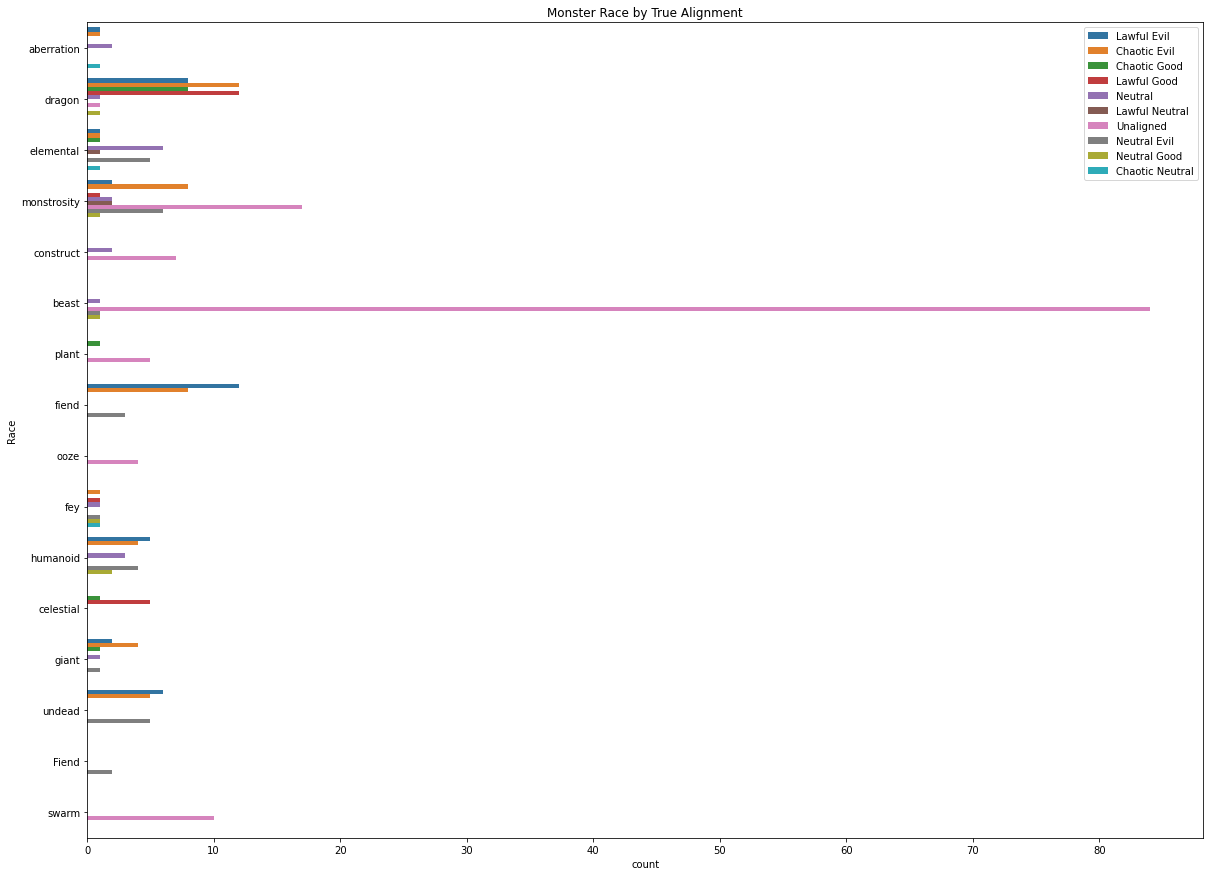

In [17]:
# group by 

true_alignments = dnd[dnd['True Alignment'] == 1]

fig, ax = plt.subplots(figsize=(20,15))
sns.countplot(y=true_alignments['Race'], hue=true_alignments['Alignment'])
plt.title('Monster Race by True Alignment')
legend = plt.legend()
plt.show()

Beasts look to fall mostly in the unaligned category which seems to make sense. We can take a closer look at some of the other races with more variety.

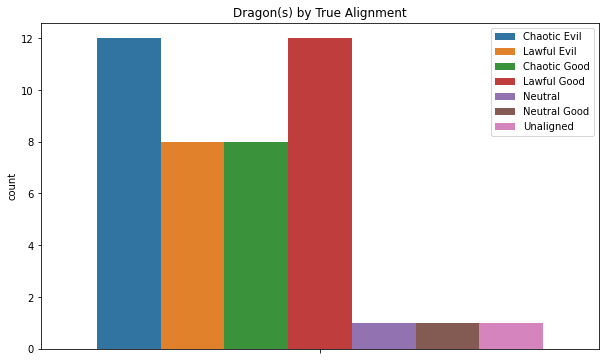

In [18]:
# create a function for looking at aligntment in individual races
def check_alignment(race):
    race = race.lower()
    single_race = true_alignments[true_alignments['Race']==race]

    fig, ax = plt.subplots(figsize=(10,6))
    sns.countplot(x=single_race['Race'], hue=single_race['Alignment'])
    plt.title(f'{race.capitalize()}(s) by True Alignment')
    legend = plt.legend()
    plt.xticks(visible=False)
    plt.xlabel("")
    plt.show()

check_alignment('dragon')

Dragons seem to have a variety, but also a dichotomy between good and evil. 

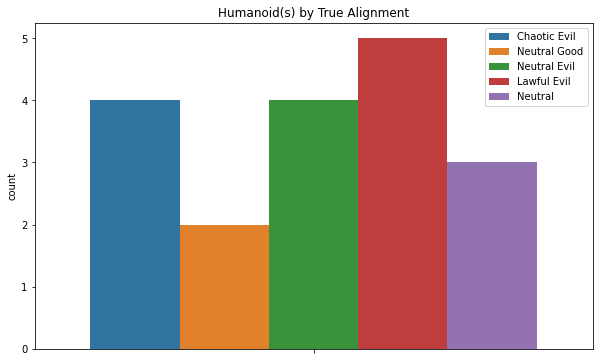

In [19]:
check_alignment('humanoid')

It seems like humans are only neutral or evil, which makes sense since most player characters are going to be the opposite. 

## Does monster size impact hit point amounts?

In [20]:
monster_size_and_hp = dnd[['Size', 'HP']]
monster_size = monster_size_and_hp['Size']
monster_hp = monster_size_and_hp['HP']

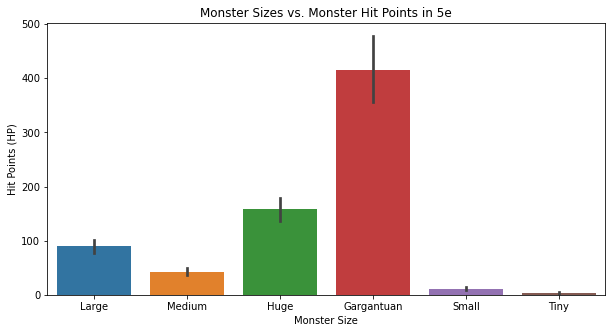

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(y=monster_hp, x=monster_size, data=monster_size_and_hp)
plt.title('Monster Sizes vs. Monster Hit Points in 5e')
plt.ylabel('Hit Points (HP)')
plt.xlabel('Monster Size')
plt.show()

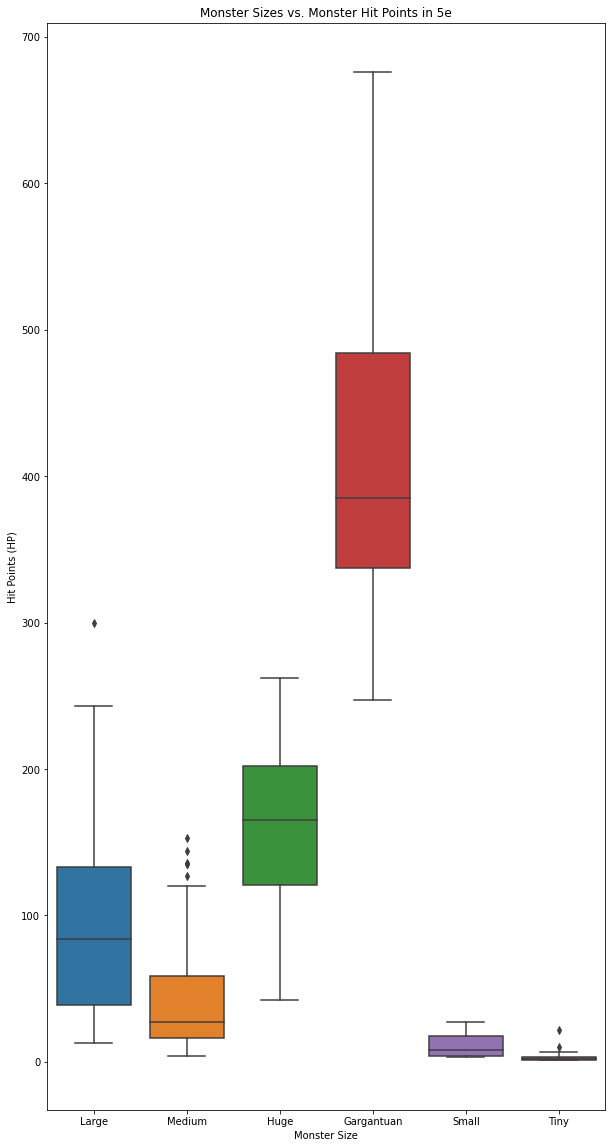

In [22]:
fig, ax = plt.subplots(figsize=(10,20))
sns.boxplot(y=monster_hp, x=monster_size, data=monster_size_and_hp)
plt.title('Monster Sizes vs. Monster Hit Points in 5e')
plt.ylabel('Hit Points (HP)')
plt.xlabel('Monster Size')
plt.show()

In [23]:
# finding the largest HP unit in a given monster size category
def find_monster_in_size_with_max_hp(size):
    df = dnd[monster_size==size.capitalize()]
    return df.loc[df['HP'] == df['HP'].max()]['Name'].values[0]
    # dnd[dnd['HP'] == dnd['HP'].max()]['Name'].values[0]

find_monster_in_size_with_max_hp('Gargantuan')

'Tarrasque'

Based off the chart above, the average HP for a monster is definitely associated with it's size. 

## Does a monster’s armor class have a correlation with its hit points?

In [24]:
#Let's associate the string values of size to numbers so they are ordered in the scatter plot
MONSTER_SIZE_VALUE = {'Tiny': 1,
                      'Small': 2,
                      'Medium': 4,
                      'Large': 8,
                      'Huge': 16,
                      'Gargantuan': 32}

dnd['Size Value'] = dnd['Size'].map(MONSTER_SIZE_VALUE)

In [25]:
dnd.head()

,Name,Size,HP,Armor,Speed,Race,Alignment,True Alignment,Size Value
0,Aboleth,Large,135,17,"10 ft., swim 40 ft.",aberration,Lawful Evil,1,8
1,Acolyte,Medium,9,10,30 ft.,humanoid,Any Alignment,0,4
2,Adult Black Dragon,Huge,195,19,"40 ft., fly 80 ft., swim 40 ft.",dragon,Chaotic Evil,1,16
3,Adult Blue Dragon,Huge,225,19,"40 ft., burrow 30 ft., fly 80 ft.",dragon,Lawful Evil,1,16
4,Adult Brass Dragon,Huge,172,18,"40 ft., burrow 40 ft., fly 80 ft.",dragon,Chaotic Good,1,16


In [26]:
list(dnd['Size'].unique())

['Large', 'Medium', 'Huge', 'Gargantuan', 'Small', 'Tiny']

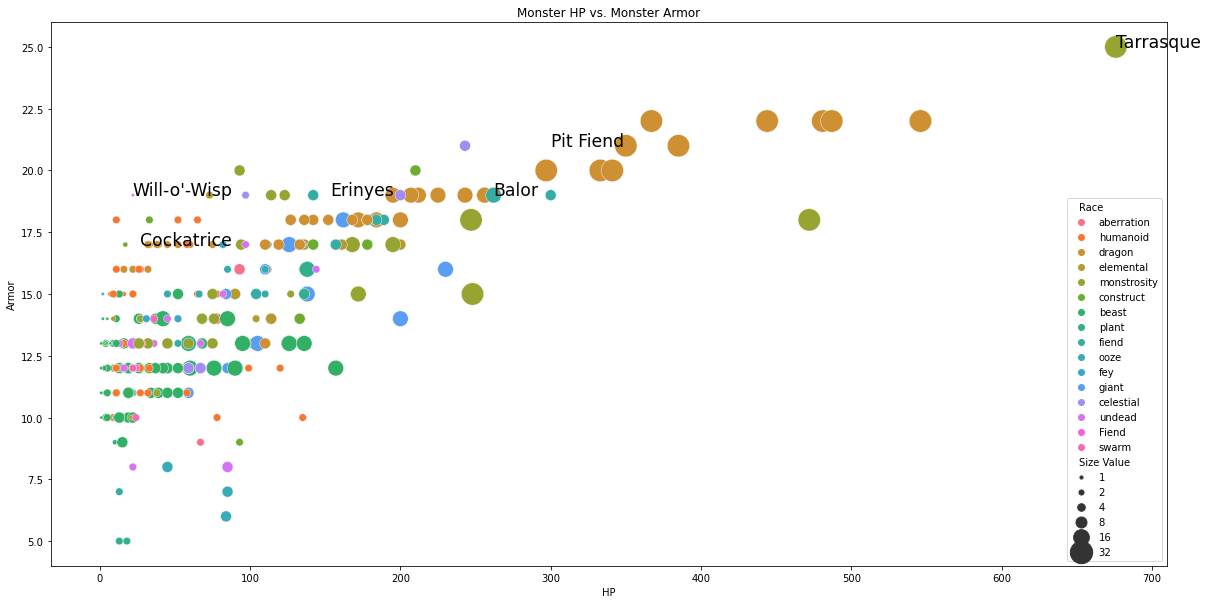

In [31]:
monster_hp = dnd['HP']
monster_armor = dnd['Armor']

MONSTER_SYMBOLS = []



fig,ax = plt.subplots(figsize=(20,10))

sns.scatterplot(x=monster_hp, y=monster_armor, hue=dnd['Race'], size=dnd['Size Value'], sizes=(10, 500))
plt.text(monster_hp[dnd['Size']=='Tiny'].max(),monster_armor[dnd['Size']=='Tiny'].max(),find_monster_in_size_with_max_hp('Tiny'), color='black', fontsize='xx-large', fontvariant='small-caps')
plt.text(monster_hp[dnd['Size']=='Small'].max(),monster_armor[dnd['Size']=='Small'].max(),find_monster_in_size_with_max_hp('Small'), color='black', fontsize='xx-large', fontvariant='small-caps')
plt.text(monster_hp[dnd['Size']=='Medium'].max(),monster_armor[dnd['Size']=='Medium'].max(),find_monster_in_size_with_max_hp('Medium'), color='black', fontsize='xx-large', fontvariant='small-caps')
plt.text(monster_hp[dnd['Size']=='Large'].max(),monster_armor[dnd['Size']=='Large'].max(),find_monster_in_size_with_max_hp('Large'), color='black', fontsize='xx-large', fontvariant='small-caps')
plt.text(monster_hp[dnd['Size']=='Huge'].max(),monster_armor[dnd['Size']=='Huge'].max(),find_monster_in_size_with_max_hp('Huge'), color='black', fontsize='xx-large', fontvariant='small-caps')
plt.text(monster_hp[dnd['Size']=='Gargantuan'].max(),monster_armor[dnd['Size']=='Gargantuan'].max(),find_monster_in_size_with_max_hp('Gargantuan'), color='black', fontsize='xx-large', fontvariant='small-caps')

ax.set_title('Monster HP vs. Monster Armor')
plt.savefig('graphs/monster_hp_vs_armor.png')

What is that dot in the top right???

In [28]:
dnd[dnd['HP'] == dnd['HP'].max()]['Name'].values[0]

'Tarrasque'

The Tarrasque has the highest HPs and Armor class, making it a very powerful and strong opponent.